In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
df=pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
17,1540,3,60.0
15,1175,2,42.0
16,1180,3,48.0
8,1310,3,50.0
9,3700,5,167.0


In [48]:
from sklearn import preprocessing

In [49]:
df.drop('price',axis='columns')

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [50]:
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X=sx.fit_transform(df.drop('price',axis='columns'))
scaled_X
print(scaled_X.shape)
scaled_X.T
print(scaled_X.T.shape)

(20, 2)
(2, 20)


In [51]:
scaled_Y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_Y.shape

(20, 1)

In [52]:
# BATCH_GRADIENT_DESCENT
np.ones(shape=2).shape

(2,)

# Batch_Gradient_Descent

In [53]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    print(epochs)
    for i in range(epochs):
        y_predicted=np.dot(w,X.T)+b
        
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            #print(cost,i)
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list
    
w, b, cost, cost_list, epoch_list=batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)
w, b, cost
        
    

500


(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

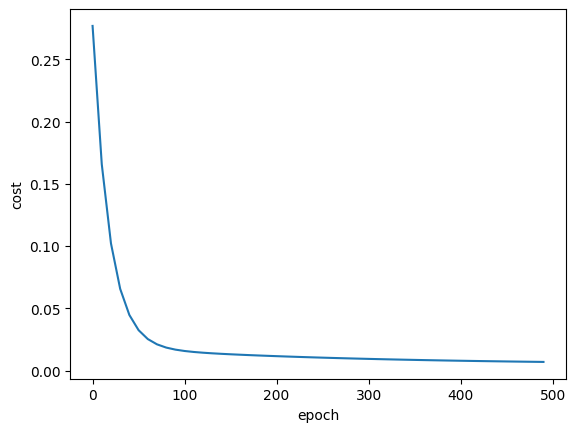

In [54]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [55]:
def predict(area,bedrooms,w,b):
    scaled_X=sx.transform([[area,bedrooms]])[0]
    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    
    return sy.inverse_transform([[scaled_price]])

predict(2600,4,w,b)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

In [56]:
import random
random.randint(0,6)

0

##  Stochastic_Gradient_Descent

In [90]:
# Stochastic_Gradient_Descent

def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    # numpy array with 1 row and column equal to number of features. In
    
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+b
        
        w_grad=-(2)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2)*(sample_y-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.square(sample_y-y_predicted))
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list


        
        

In [58]:
w, b, cost, cost_list, epoch_list=stochastic_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),10000)
w, b, cost

(array([0.84578047, 0.30359694]), -0.09099439915069515, 0.000339378490029925)

In [59]:
w

array([0.84578047, 0.30359694])

In [60]:
b

-0.09099439915069515

In [61]:
cost
predict(2600,4,w,b)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[121.32551654]])

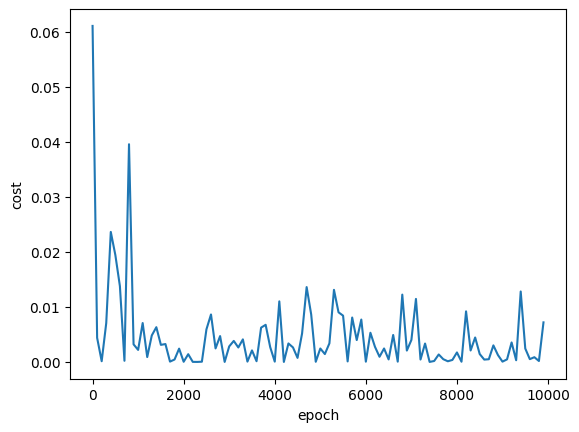

In [62]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

## mini_batch_gradient_descent

In [91]:
def mini_batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    # numpy array with 1 row and column equal to number of features. In
    
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    #print(total_samples)
    sz=4
    ini=0;
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        sample_x=X[ini:ini+4,:]
        #print(sample_x.shape)
        sample_y=y_true[ini:ini+4]
        #print(sample_y.shape)
        y_predicted=np.dot(w,sample_x.T)+b
        w_grad=-(2/4)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2/4)*(sample_y-y_predicted)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(sample_y-y_predicted))
        ini=(ini+4)%20
        #print("ini ",ini)
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [92]:
w, b, cost, cost_list, epoch_list=mini_batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),10000)

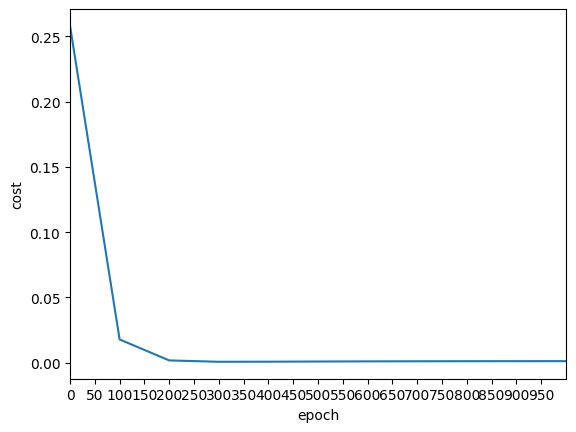

In [95]:
plt.xlim(0,1000)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.xticks(np.arange(0, 1000,50))
plt.plot(epoch_list,cost_list)

## Momentum Based Gradient Descent

In [127]:
def gradient_descent_with_momentum(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    # numpy array with 1 row and column equal to number of features. In
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    a=0.5
    pwt=0
    pbt=0
    for i in range(epochs):
        sample_x=X
        sample_y=y_true
        y_predicted=np.dot(w,sample_x.T)+b
        
        w_grad=-(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2/total_samples)*(sample_y-y_predicted)
        wt=a*pwt+learning_rate*w_grad
        bt=a*pbt+learning_rate*b_grad
        pwt=wt
        pbt=bt
        w=w-wt
        b=b-bt
        
        cost=np.mean(np.square(sample_y-y_predicted))
        if i%10==0:
            #print(cost,i)
            cost_list.append(cost)
            epoch_list.append(i)
     
    return w, b, cost, cost_list, epoch_list


In [133]:
def nestrov_momentum_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    # numpy array with 1 row and column equal to number of features. In
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    a=0.1
    pwt=0
    pbt=0
    for i in range(epochs):
        sample_x=X
        sample_y=y_true
        w=w-a*pwt
        b=b-a*pbt
        y_predicted=np.dot(w,sample_x.T)+b
        w_grad=-(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2/total_samples)*(sample_y-y_predicted)
        wt=a*pwt+learning_rate*w_grad
        bt=a*pbt+learning_rate*b_grad
        pwt=wt
        pbt=bt
        w=w-wt
        b=b-bt
        
        cost=np.mean(np.square(sample_y-y_predicted))
        if i%10==0:
            #print(cost,i)
            cost_list.append(cost)
            epoch_list.append(i)
     
    return w, b, cost, cost_list, epoch_list
        
        
        

In [143]:
w, b, cost, cost_list_m, epoch_list=gradient_descent_with_momentum(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)

In [144]:
wsg, bsg, costsg, cost_list_sg, epoch_list=batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)

500


## Plot of Momentum_Based_Gradient_Descent vs Vanilla_Based_Gradient_Descent

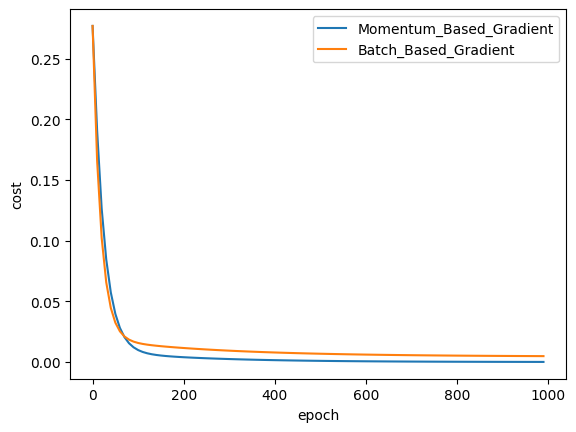

In [136]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list_m,label='Momentum_Based_Gradient')
plt.plot(epoch_list,cost_list_sg,label='Batch_Based_Gradient')
plt.legend()
plt.show()

## The graph shows that momentum based gradient descent converges faster than vannila gradient descent

In [145]:
w, b, cost, cost_list_nm, epoch_list=nestrov_momentum_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)


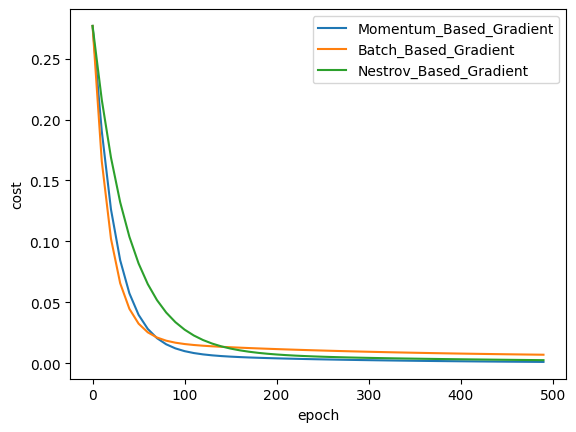

In [146]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list_m,label='Momentum_Based_Gradient')
plt.plot(epoch_list,cost_list_sg,label='Batch_Based_Gradient')
plt.plot(epoch_list,cost_list_nm,label='Nestrov_Based_Gradient')
plt.legend()
plt.show()